In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import plotly.express as px
import plotly.graph_objects as go
import re
import pandas as pd

Load Data

In [3]:
df = pd.read_csv('data/BBCNewsProcessed.csv')

In [4]:
df

,title,description,publisheddate,section,site
0,The $100bn ghost city in southern Malaysia,The Chinese-built city was supposed to be a th...,2023-12-11,News,Asia
1,Forest City: Inside Malaysia's Chinese-built '...,"Built during the Chinese property boom, Forest...",2023-12-05,News,Business
2,Malaysian killer released from Australian immi...,An ex-policeman convicted in a politically cha...,2023-11-13,News,Australia
3,Israel-Gaza: Malaysia will maintain ties with ...,Analysts say Mr Anwar's stand is politically e...,2023-11-08,News,Asia
4,Matty Healy defends Malaysia kiss during 1975 ...,The 1975 frontman read a prepared speech from ...,2023-10-10,News,Entertainment & Arts
...,...,...,...,...,...
235,Najib Razak: Malaysia's former PM and his down...,The former PM promised to boost Malaysia's eco...,2013-05-01,News,Asia
236,Anwar Ibrahim: The man who fulfilled his goal ...,"After a decades-long quest to become premier, ...",2012-01-06,News,Asia
237,Malaysia country profile,"Provides an overview of Malaysia, including ke...",2011-10-21,News,Asia
238,Malaysia media guide,"An overview of the media in Malaysia, includin...",2011-10-21,News,Asia-Pacific


<h>Data Processing<h/>


Removal Irrelevant Article

In [5]:
df = df.loc[:236]

In [6]:
df

,title,description,publisheddate,section,site
0,The $100bn ghost city in southern Malaysia,The Chinese-built city was supposed to be a th...,2023-12-11,News,Asia
1,Forest City: Inside Malaysia's Chinese-built '...,"Built during the Chinese property boom, Forest...",2023-12-05,News,Business
2,Malaysian killer released from Australian immi...,An ex-policeman convicted in a politically cha...,2023-11-13,News,Australia
3,Israel-Gaza: Malaysia will maintain ties with ...,Analysts say Mr Anwar's stand is politically e...,2023-11-08,News,Asia
4,Matty Healy defends Malaysia kiss during 1975 ...,The 1975 frontman read a prepared speech from ...,2023-10-10,News,Entertainment & Arts
...,...,...,...,...,...
232,Malaysia airline cockpit scare,The moment armed police carried a man off a fl...,2017-06-01,News,World
233,Malaysia Airlines plane threat foiled by 'hero...,A witness tells how passengers tackled a man w...,2017-06-01,News,Australia
234,Malaysia Airlines plane turns back after cockp...,The Malaysia Airlines jet returned to Melbourn...,2017-05-31,News,Australia
235,Najib Razak: Malaysia's former PM and his down...,The former PM promised to boost Malaysia's eco...,2013-05-01,News,Asia


In [7]:
# Lower Case all text
df['title'] = df['title'].apply(lambda x:x.lower())
df['title'] = df['title'].apply(lambda x: re.sub('[\W]+',' ',x))
df['description'] = df['description'].apply(lambda x:x.lower())
df['description'] = df['description'].apply(lambda x: re.sub('[\W]+',' ',x))
df.head(5)

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_8216\1997014281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].apply(lambda x:x.lower())
C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_8216\1997014281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].apply(lambda x: re.sub('[\W]+',' ',x))
C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_8216\1997014281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,title,description,publisheddate,section,site
0,the 100bn ghost city in southern malaysia,the chinese built city was supposed to be a th...,2023-12-11,News,Asia
1,forest city inside malaysia s chinese built gh...,built during the chinese property boom forest ...,2023-12-05,News,Business
2,malaysian killer released from australian immi...,an ex policeman convicted in a politically cha...,2023-11-13,News,Australia
3,israel gaza malaysia will maintain ties with h...,analysts say mr anwar s stand is politically e...,2023-11-08,News,Asia
4,matty healy defends malaysia kiss during 1975 ...,the 1975 frontman read a prepared speech from ...,2023-10-10,News,Entertainment & Arts


In [8]:
def getSentiment(polarity_score):
    neutrality_threshold = 0.2
    sentiment = polarity_score['compound']
    if abs(sentiment) >= neutrality_threshold:
        if sentiment > 0:
            return 'Positive'
        else:
            return 'Negative'
    else:
        return 'Neutral'

In [9]:
sia = SIA()
for index in range(len(df)):
    pol_score_title = sia.polarity_scores(df['title'][index])
    pol_score_description = sia.polarity_scores(df['description'][index])
    combined_score = {
        'compound': (pol_score_title['compound'] + pol_score_description['compound']) / 2
    }
    df.loc[index,'sentiment'] = getSentiment(combined_score)

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_8216\2355867862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index,'sentiment'] = getSentiment(combined_score)


In [10]:
df

,title,description,publisheddate,section,site,sentiment
0,the 100bn ghost city in southern malaysia,the chinese built city was supposed to be a th...,2023-12-11,News,Asia,Neutral
1,forest city inside malaysia s chinese built gh...,built during the chinese property boom forest ...,2023-12-05,News,Business,Negative
2,malaysian killer released from australian immi...,an ex policeman convicted in a politically cha...,2023-11-13,News,Australia,Negative
3,israel gaza malaysia will maintain ties with h...,analysts say mr anwar s stand is politically e...,2023-11-08,News,Asia,Positive
4,matty healy defends malaysia kiss during 1975 ...,the 1975 frontman read a prepared speech from ...,2023-10-10,News,Entertainment & Arts,Positive
...,...,...,...,...,...,...
232,malaysia airline cockpit scare,the moment armed police carried a man off a fl...,2017-06-01,News,World,Negative
233,malaysia airlines plane threat foiled by heroe...,a witness tells how passengers tackled a man w...,2017-06-01,News,Australia,Negative
234,malaysia airlines plane turns back after cockp...,the malaysia airlines jet returned to melbourn...,2017-05-31,News,Australia,Neutral
235,najib razak malaysia s former pm and his downf...,the former pm promised to boost malaysia s eco...,2013-05-01,News,Asia,Neutral


Sentiment Trend

In [11]:
df = df.sort_values(by='publisheddate',ascending=True).reset_index(drop=True)
df['publisheddate'] = pd.to_datetime(df['publisheddate'])
df.head(4)

,title,description,publisheddate,section,site,sentiment
0,anwar ibrahim the man who fulfilled his goal t...,after a decades long quest to become premier a...,2012-01-06,News,Asia,Positive
1,najib razak malaysia s former pm and his downf...,the former pm promised to boost malaysia s eco...,2013-05-01,News,Asia,Neutral
2,malaysia airlines plane turns back after cockp...,the malaysia airlines jet returned to melbourn...,2017-05-31,News,Australia,Neutral
3,malaysia airlines plane threat foiled by heroe...,a witness tells how passengers tackled a man w...,2017-06-01,News,Australia,Negative


In [12]:
from wordcloud import WordCloud,ImageColorGenerator
import numpy as np 
import PIL.Image
import matplotlib.pyplot as plt
from nltk.corpus import stopwords



stop_words = set(stopwords.words('english'))
stop_words.update(['malaysia','malaysian','ex','correspondent'])

malaysianFlag_mask =np.array(PIL.Image.open('assets/Flag_of_Malaysia.svg.png'))
malaysianFlag_colormap =ImageColorGenerator(malaysianFlag_mask)


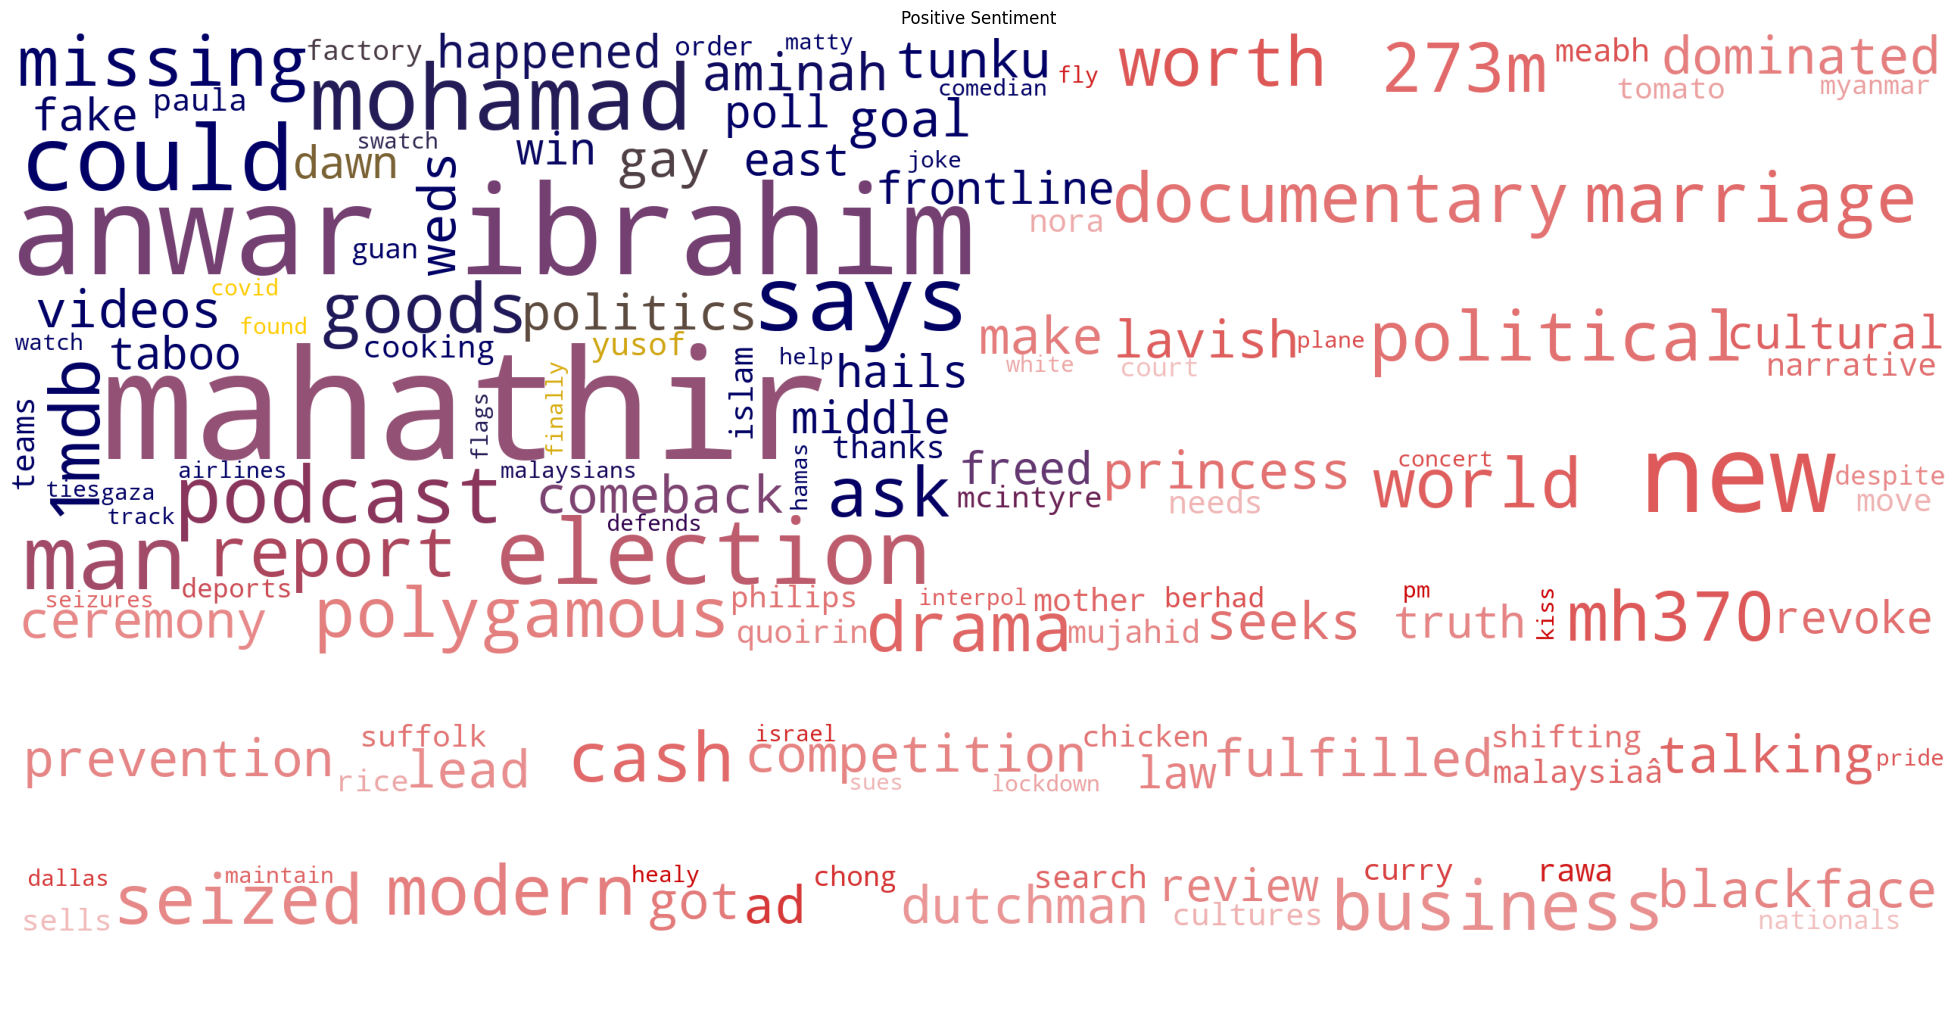

In [13]:
positive_text = " ".join(df[df['sentiment'] == 'Positive']['title'])

wordcloud_positive = WordCloud(stopwords=stop_words, 
                               mask=malaysianFlag_mask,
                               background_color='white').generate(positive_text)
wordcloud_positive.recolor(color_func=malaysianFlag_colormap)


fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud_positive)
plt.title('Positive Sentiment')
plt.axis('off')
plt.show()

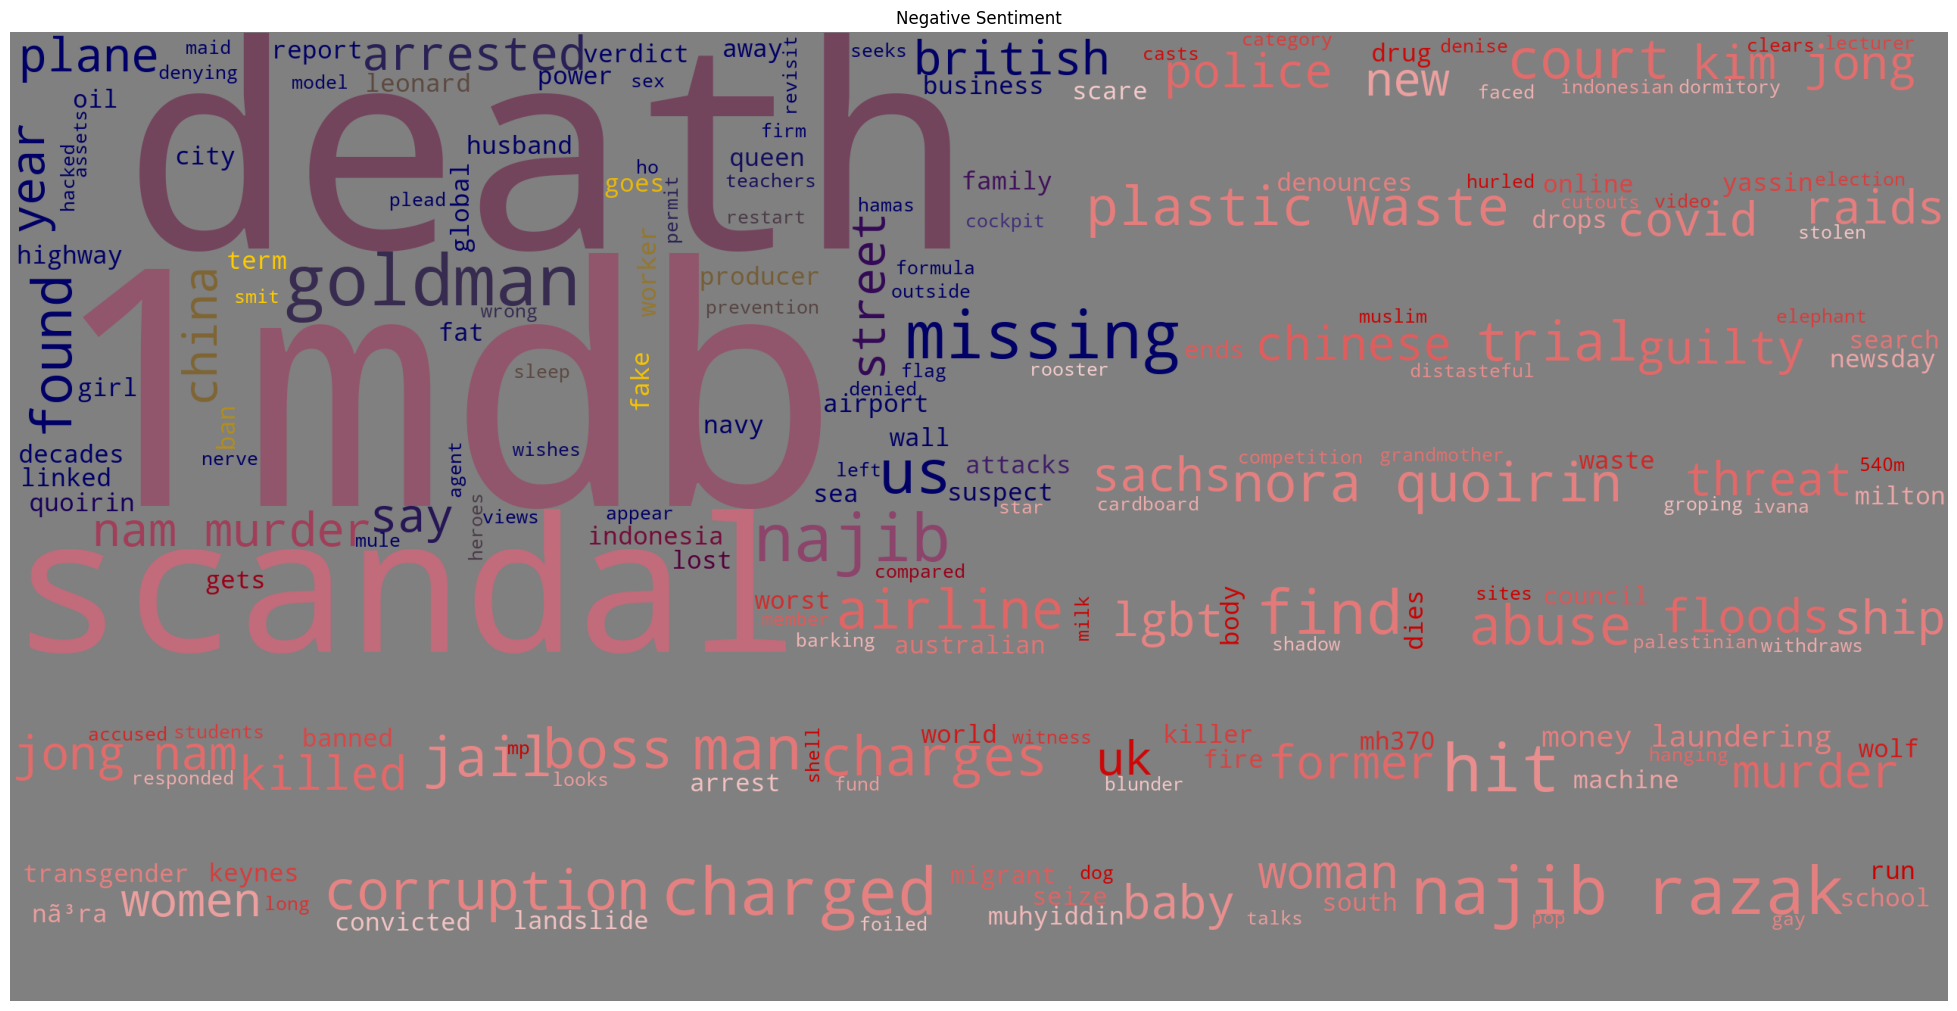

In [30]:
negative_text = " ".join(df[df['sentiment'] == 'Negative']['title'])

wordcloud_negative= WordCloud(stopwords=list(stop_words)+['pm'], 
                               mask=malaysianFlag_mask,
                               background_color='lightgrey').generate(negative_text)
wordcloud_negative.recolor(color_func=malaysianFlag_colormap)


fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud_negative)
plt.title('Negative Sentiment')
plt.axis('off')
plt.show()

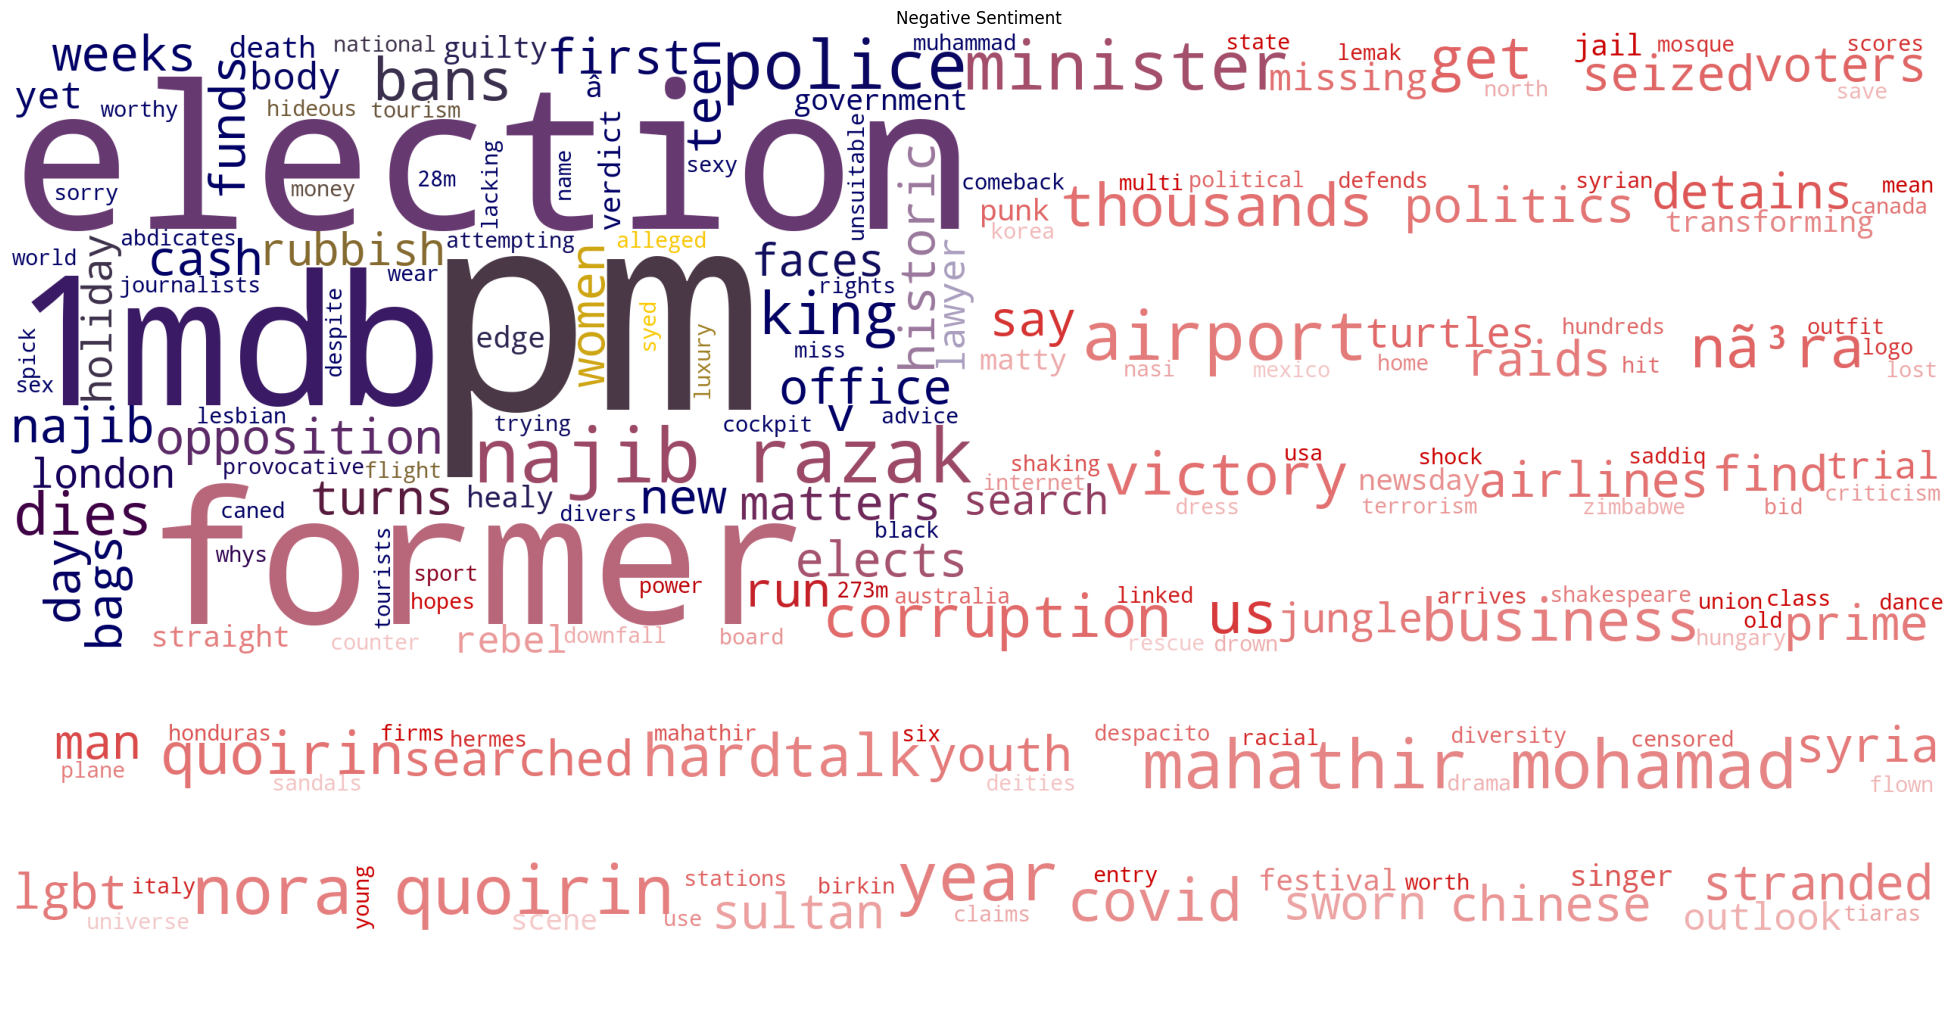

In [15]:
neutral_text = " ".join(df[df['sentiment'] == 'Neutral']['title'])

wordcloud_neutral= WordCloud(stopwords=list(stop_words)+['back'], 
                               mask=malaysianFlag_mask,
                               background_color='white').generate(neutral_text)
wordcloud_neutral.recolor(color_func=malaysianFlag_colormap)


fig = plt.figure(figsize=(25,25))
plt.imshow(wordcloud_neutral)
plt.title('Negative Sentiment')
plt.axis('off')
plt.show()

In [16]:
df_sentiment = df.copy()

In [17]:
df_sentiment = df_sentiment.groupby(by=['publisheddate','sentiment'])['sentiment'].count().to_frame('count').reset_index()

In [18]:
df_sentiment['score'] = 0
df_sentiment['score'][0] = 1
df_sentiment

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_8216\2468039326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['score'][0] = 1


,publisheddate,sentiment,count,score
0,2012-01-06,Positive,1,1
1,2013-05-01,Neutral,1,0
2,2017-05-31,Neutral,1,0
3,2017-06-01,Negative,2,0
4,2017-06-02,Negative,1,0
...,...,...,...,...
205,2023-10-10,Positive,1,0
206,2023-11-08,Positive,1,0
207,2023-11-13,Negative,1,0
208,2023-12-05,Negative,1,0


In [19]:
for index in range(1,len(df_sentiment)):
    if df_sentiment.loc[index]['sentiment'] == 'Positive':
       df_sentiment.loc[index, 'score'] = df_sentiment.loc[index - 1, 'score'] + ( 1 * df_sentiment.loc[index, 'count'])
    elif df_sentiment.loc[index]['sentiment'] == 'Neutral':
       df_sentiment.loc[index, 'score'] = df_sentiment.loc[index - 1, 'score'] + 0 
    elif df_sentiment.loc[index]['sentiment'] == 'Negative':
       df_sentiment.loc[index, 'score'] = df_sentiment.loc[index - 1, 'score'] - ( 1 * df_sentiment.loc[index, 'count'])

In [20]:
df_sentiment.loc[1.5] = np.NaN
df_sentiment = df_sentiment.sort_index().reset_index(drop=True)
df_sentiment

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_8216\4262957469.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_sentiment.loc[1.5] = np.NaN


,publisheddate,sentiment,count,score
0,2012-01-06,Positive,1.0,1.0
1,2013-05-01,Neutral,1.0,1.0
2,NaT,NaN,NaN,NaN
3,2017-05-31,Neutral,1.0,1.0
4,2017-06-01,Negative,2.0,-1.0
...,...,...,...,...
206,2023-10-10,Positive,1.0,-87.0
207,2023-11-08,Positive,1.0,-86.0
208,2023-11-13,Negative,1.0,-87.0
209,2023-12-05,Negative,1.0,-88.0


In [21]:
fig = go.Figure()
fig.update_layout(
 title="BBC News Report's Sentiment Score on Malaysia",
 xaxis_title="Time",
 yaxis_title="Sentiment Score",
 template = 'plotly_dark'
)
fig.add_trace(go.Line(y=df_sentiment['score'],x=df_sentiment['publisheddate'], connectgaps=False))
fig.add_vrect(x0='2013-05-01',x1='2017-05-31',annotation_text="No News Reports", annotation_position="bottom left",
              fillcolor="grey", opacity=0.25, line_width=0)
fig.add_hline(y=0,annotation_text='Neutral Sentiment',line_dash="dash")
fig.add_annotation(x='2018-05-09',y=-18, 
            text="GE15",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x='2018-07-03',y=-18, 
            text="DS Najib's Arrest",
            font=dict(color = 'lightblue'),
            showarrow=True,
            arrowhead=7,
            ax=50,
            ay=-30,)
fig.show()

e:\Github Repositories\NewsNLP\.venv\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [22]:
df_pie = df.copy()

In [23]:
len(df_pie['site'].unique())

25

In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=5, cols=5, subplot_titles=df_pie['site'].unique(), specs=[[{'type':'pie'}]*5]*5)

for index, site in enumerate(df_pie['site'].unique()):
    sentiment_value_counts = df_pie[df_pie['site'] == site]['sentiment'].value_counts().to_list()
    row = index // 5 + 1
    col = index % 5+ 1
    fig.add_trace(go.Pie(labels=df_pie['sentiment'].unique(), values=sentiment_value_counts),
                  row=row, col=col, )

fig.update_layout(autosize=False,
    width=1400,
    height=700,)
fig.show()